<a href="https://colab.research.google.com/github/anitakumar/ml/blob/main/Copy_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing Linear Regression on Advertising dataset

## Why do you use Regression Analysis?

Regression analysis estimates the relationship between two or more variables.


In [62]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error #METRICS to measeure the model
from math import sqrt

# this allows plots to appear directly in the notebook
%matplotlib inline

Let's take a look at some data, ask some questions about that data, and then use Linear regression to answer those questions.

In [63]:
d1 = pd.read_csv('Advertising.csv')
d1.head()
d1.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [64]:
# read data into a DataFrame
#Data source link : https://drive.google.com/file/d/177OXKeX2ahQly3ChNtx7nFtnCUGZJ7QT/view?usp=sharing
data = pd.read_csv('Advertising.csv', index_col=0)
#data.head()
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


 **Independent variables**
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

**Target Variable**
- Sales: sales of a single product in a given market (in thousands of widgets)

In [65]:
# print the shape of the DataFrame
data.shape

(200, 4)

<Axes: xlabel='Newspaper', ylabel='Sales'>

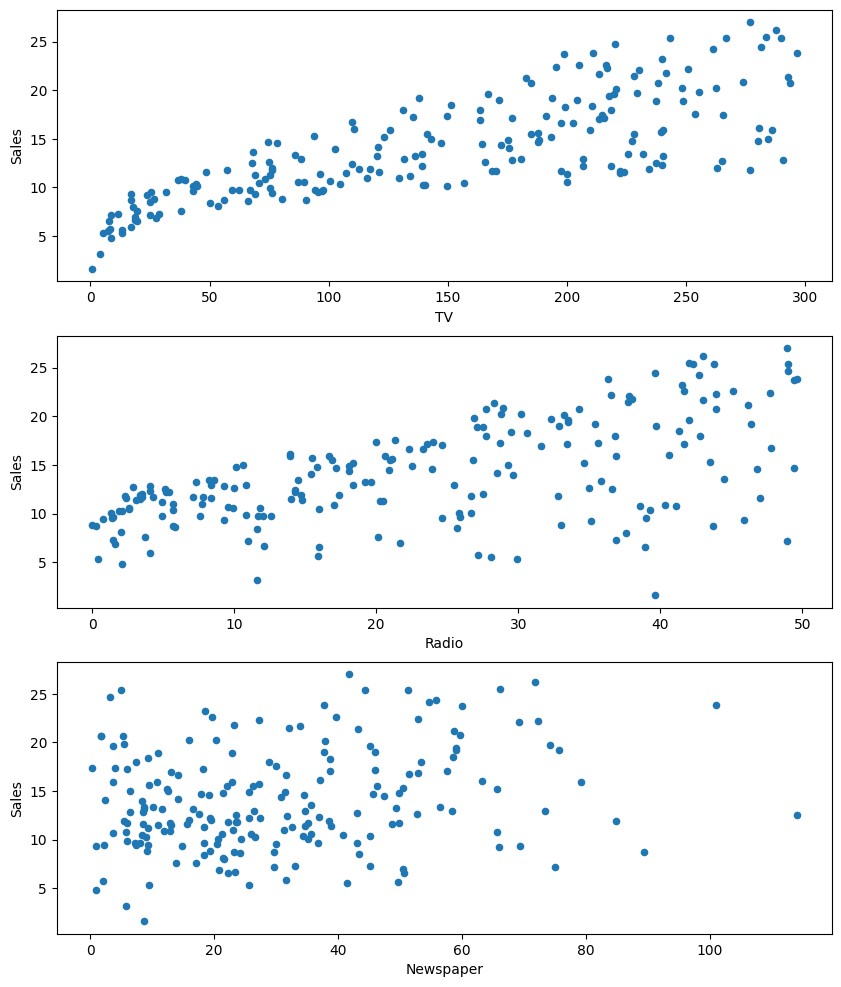

In [66]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(3, 1, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(10, 12))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Note 1 : The variance of the errors should be consistent for all observations.
##          i.e, the variance does not change for each observation or for a range of observations.
##          This preferred condition is known as homoscedasticity (same scatter).
##          If the variance changes, then its heteroscedasticity (different scatter).
## Note 2 : heteroscedasticity appears as a cone shape where the spread of the residuals increases in one direction.

<Axes: >

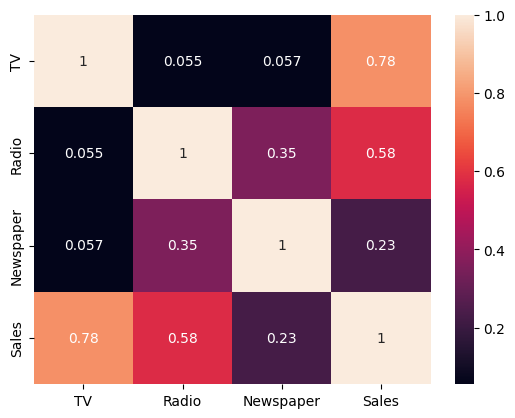

In [67]:
# prompt: heat maps

import seaborn as sns
sns.heatmap(data.corr(), annot=True)


In [68]:
# prompt: which data is more heterscedascitiy

# Newspaper data is more heterscedascitiy



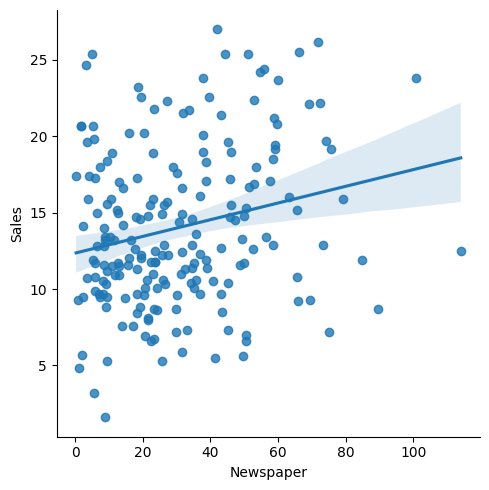

In [69]:
## EXTRA code
import seaborn as sns
data1 = pd.read_csv('Advertising.csv', index_col=0)

sns.lmplot(x='Newspaper',y='Sales',data=data)

## Questions About the Advertising Data

On the basis of this data, how should you spend advertising money in the future?
These general questions might lead you to more specific questions:

1. Is there a relationship between TV-ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending, can sales be predicted?

Exploring these questions below.

In [70]:
# create X and y
#taking only one variable for now
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)  ## y = (coef_)x + intercept_

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


## Interpreting Model Coefficients

How do you interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending was **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads was **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

Model coefficients are weights or parameters in a statistical model that

represent the relationship between a feature and a target. They are used in many types of models, including linear regression, logistic regression, neural networks, and MARS.
Here are some things to consider when working with model coefficients:
Interpretation
In linear regression, coefficients represent the slope of a line, which shows how the dependent variable changes for each unit change in the independent variable.
Significance
The significance of a coefficient shows how likely it is that the coefficient's true value is different from zero.
Scaling
Coefficients need to be scaled to the same unit of measure to determine feature importance.
Variability
Coefficients can vary significantly when the input dataset changes, which means they might not be robust. https://www.linkedin.com/advice/1/how-can-you-interpret-regression-coefficients-cp7ze

$$\beta_0 ia a constant, \beta_1 is a slope of the line$$


## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. How would you predict the sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [71]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, you would predict Sales of **9,409 widgets** in that market.

In [72]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [73]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [74]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [75]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

Based on the predictions you draw the line, the 2 poinst are plotted on the res line

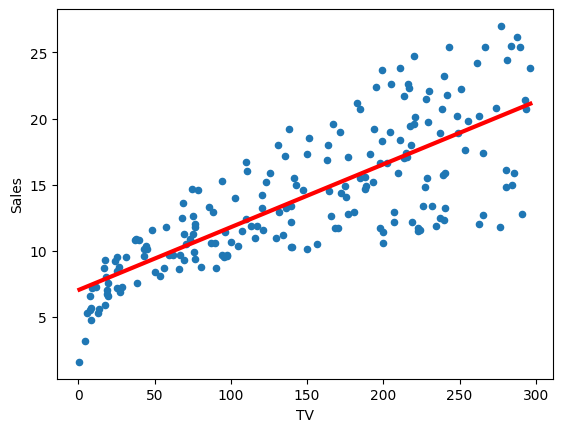

In [76]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=3)

## Linear Regression using statsmodel- Model evaluation
This to check to see if this model is good model. So we are evaluating the model
This is the model evaluation

In [77]:
import statsmodels.api as sm

X = data['TV']
y = data['Sales']

X2 = sm.add_constant(X)
## Why adding constant ?
## sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter
## in LinearRegression().
## If you don't do sm.add_constant or when LinearRegression(fit_intercept=False),
## then both statsmodels and sklearn algorithms assume that b=0 in y = mx + b,
## and it'll fit the model using b=0 instead of calculating what b is supposed
## to be based on your data.

est = sm.OLS(y, X2)  ## OLS of sm module is asame as LR of sklearn

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           1.47e-42
Time:                        16:31:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

P(measure of failure and randonmness) is 0.000 good 100 % pass and R-squared: 0.612 is greater tahnn 60 %

Statitistical Analysis :
--

1. Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). This means that there is a strong correlation between these coefficients and the target (Sales).

2. Then, looking at the R² value, we have 0.612. Therefore, about 60% of the variability of sales is explained by the amount spent on TV ads. This is okay, but definitely not the best we can to accurately predict the sales. Surely, spending on newspaper and radio ads must have a certain impact on sales.

**Let’s see if a multiple linear regression will perform better.** -- later topic

Assessing the relevancy of the model
--

To see if the model is any good, we need to look at the :

<h4><b> p-value from each coefficient. </b> </h4>

> P-values and coefficients in regression analysis work together to tell you which relationships in your model are statistically significant.

> For any modelling task, the hypothesis is that there is some correlation between the features and the target. The null hypothesis is therefore the opposite: there is no correlation between the features and the target.

> So, finding the p-value for each coefficient will tell if the variable is statistically significant to predict the target. **As a general rule of thumb, if the p-value is less than 0.05: there is a strong relationship between the variable and the target.**

<hr />

<h4> <b> R² value  </b></h4>

> Assess the accuracy of the model.
You found out that your variable was statistically significant by finding its p-value. Great!
Now, how do you know if your linear model is any good?
To assess that, we use R² statistic.

> R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

> R-squared is always between 0 and 100%:

> 0% represents a model that does not explain any of the variation in the response variable. around its mean. **Discard this model !!  Simple.**

> 100% represents a model that explains all of the variation in the response variable around its mean.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [78]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=100)

In [79]:
#without using train and test split dataset- always split the data before training
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


**Notice** that the coefficient for newspaper is negative, but also fairly small.

In [80]:
# using train, test datasets
lm = LinearRegression()
lm.fit(xtrain, ytrain)  ## 70% of the data

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


# predictions  on test dataset
predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions))) # how similar are the number in ytest and prediction

## to quickly check how good is the rmse of our model ?
## try to use this genric thumb rule : rmse <= 10% mean(target)
print(0.1 * ytrain.mean())

2.652789668879498
[0.0454256  0.18975773 0.00460308]
1.3603977338130553
1.3857857142857144


> Is it relevant to our model?

Let’s see by calculating the R² value and p-value for each coefficient.

In [81]:
##Assessing the relevancy of the model

X2 = sm.add_constant(X)

est = sm.OLS(y, X2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           1.58e-96
Time:                        16:31:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [82]:
#High r2 but avd p value const, tv, radio is ok but not newspaper I am only 1-0.860 confident so it is low
# we remove the newspaper
#dropped the feature

What are a few key things you learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus, reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending was **slightly negatively associated** with Sales. (However, this is irrelevant since as you have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.  ( See this once : https://statisticsbyjim.com/regression/interpret-adjusted-r-squared-predicted-r-squared-regression/ )

## Feature Selection

How do you decide **what features have to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [83]:
# only include TV and Radio in the model
feature_cols = ['TV', 'Radio']
Xnew = data[feature_cols]
ynew = data.Sales

X3 = sm.add_constant(Xnew)
est = sm.OLS(y, X3)
est3 = est.fit()

est3.rsquared

0.8971942610828956

In [84]:
# add Newspaper to the model (which has no association with Sales)
feature_cols = ['TV', 'Radio', 'Newspaper']
Xnew = data[feature_cols]
ynew = data.Sales

X4 = sm.add_constant(Xnew)
est = sm.OLS(y, X4)
est4 = est.fit()

est4.rsquared

0.8972106381789522

Didnt make much difference

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Handling Categorical Predictors with Two Categories

Up until now, all the predictors have been numeric. What if one of the predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [85]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, you need to represent all data **numerically**. If the feature only has two categories, you can simply create a **dummy variable** that represents the categories as a binary value:

In [86]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [87]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
#list(zip(feature_cols, lm.coef_))

dfCoeffients = pd.DataFrame(data = lm.coef_, index = feature_cols , columns = ["Slope / Coeffient"])
dfCoeffients

,Slope / Coeffient
TV,0.045720
Radio,0.188728
Newspaper,-0.001098
IsLarge,0.057424


How do you interpret the **IsLarge coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market was associated with an average **increase** in Sales of 5.742 widgets (as compared to a Small market, which is called the **baseline level**).

What if you had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [88]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


You have to represent Area numerically, but  can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, create **another dummy variable**:

In [89]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,False,False
2,44.5,39.3,45.1,10.4,small,0,urban,False,True
3,17.2,45.9,69.3,9.3,small,0,rural,False,False
4,151.5,41.3,58.5,18.5,small,0,urban,False,True
5,180.8,10.8,58.4,12.9,large,1,suburban,True,False


Here is how you interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do you only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why you only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [92]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
# print(feature_cols, lm.coef_)
dfCoeffients_ = pd.DataFrame(data = lm.coef_, index = feature_cols , columns = ["Slope / Coeffient"])
dfCoeffients_

,Slope / Coeffient
TV,0.045744
Radio,0.187867
Newspaper,-0.001088
IsLarge,0.077397
Area_suburban,-0.106563
Area_urban,0.268138


How do you interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area it is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area it is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (1, 2, 3, 4, 5).